# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель проекта**:
Провести исследовательский анализ данных и установить параметры, влияющие на цену объектов недвижимости. 

**План проекта**

 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.

### Откройте файл с данными и изучите общую информацию

In [1]:
# Импортируем библиотеку pandas и matplotlib. Считываем данные из csv-файла в датафрейм и сохраняем в переменную data.

import pandas as pd
import matplotlib.pyplot as plt
import datetime

data = pd.read_csv('real_estate_data.csv', sep = '\t')

# Выведем основную информацию о датафрейме 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
# Добавим информацию о количестве строк в первоначальном датасете 
data_raw = data.shape[0]

In [3]:
#Выведем первые 20 строчек датафрейма на экран

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


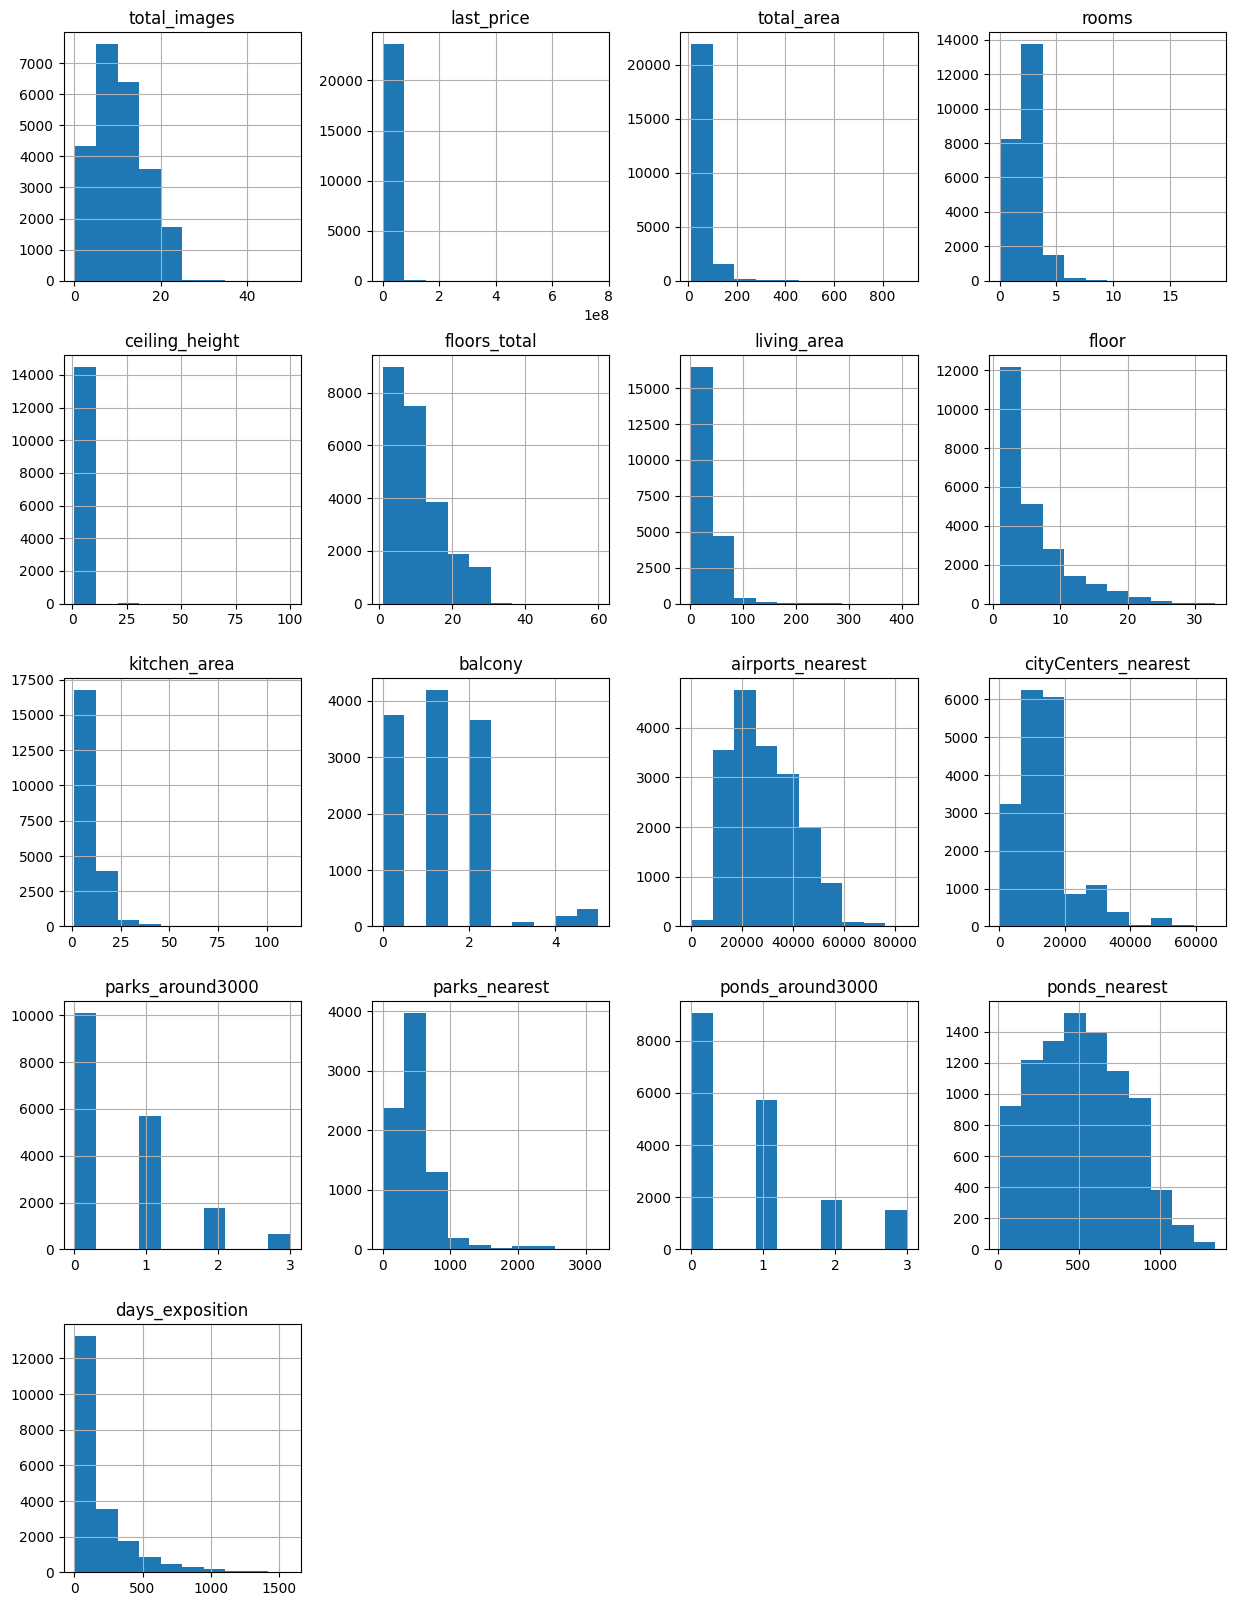

In [4]:
#Построим гистограмму для всех числовых столбцов таблицы на одном графике. 

data.hist(figsize=(15, 20))
plt.show()

На первый взгляд распределения похожи на нормальные, на гистограмме по значениям высоты потолков, количеству балконов, жилой площади и последней стоимости квартиры, а также по значениям близости парков и водоемов видим много нулевых значений. Это может быть связано с пропусками в данных.


### Выполните предобработку данных

In [5]:
# Найдем количество пропусков в каждом столбце датафрейма

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Заполним пропуски в столбце 'balcony' на нули. 

data['balcony'] = data['balcony'].fillna(0)

In [8]:
# Заполним пропуски в столбце 'is_apartment' на False. 

data['is_apartment'] = data['is_apartment'].fillna(False)

In [9]:
# Удалим строки с пропусками в столбце 'locality_name'

data = data.dropna(subset=['locality_name'])

In [10]:
# Переименуем столбец 'cityCenters_nearest'

data = data.rename(columns={'cityCenters_nearest': 'citycenters_nearest'})

Найдены пропуски в 14 столбцах из 22. 

Причиной пропусков в столбцах с информацией о высоте потолков, количестве этажей в здании, метраже жилой площади и кухни можно считать человеческий фактор, собственники не посчитали важной эту информацию и пропустили ее при заполнении. При этом заполнены без пропусков важные смежные данные: этаж, на котором расположена квартира, общая площадь.

Пропуски в столбце с информацией о типе квартиры: апартаменты или о количестве балконов может быть пропущено, если балконов нет, информацию об апартаментах могли пропустить так как не сочли ее важной.

Есть вероятность, что пропуск в количестве дней размещения объявления до снятия был сделан намерено или же объявление не является настоящим - следовательно, квартира не была продана. 

Есть схожие по количеству пропуски в столбцах с информацией о близости ближайших парков и водоемов - так как данные получаются с карт, можно считать, что пропуск был сделан в связи с ошибкой в картах или же данные не были получены полностью. 
Такой же вывод можно сделать для пропусков в столбцах с информацией о близости центра города/аэропорта и количестве парков/водоемов в радиусе 3 км. 

In [11]:
from datetime import datetime 

In [12]:
# Изменим тип данных в столбце 'first_day_exposition'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']).apply(lambda x: x.date())
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Тип данных в столбце 'дата публикации' поменяли на datetime, чтобы можно было провести операции со временем позже. 

In [13]:
# Найдем неявные дубликаты в столбце с названием района

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [14]:
# Устраним неявные дубликаты в столбце с названием района

data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа ', 'городской поселок ', 'деревня ', 'коттеджный поселок ', 'садовое товарищество ', 'поселок ', 'садоводческое некоммерческое товарищество'], '', regex=True)
    .replace('село ', '')
)

# Проверим новый список значений

data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'село Павлово', 'Оредеж', 'село Копорье', 'Молодежное', 'Тихвин',
       'Победа', 'Нурма', 'Синявино', 'Тосно', 'Стрельна', 

### Добавьте в таблицу новые столбцы

In [15]:
# Добавим новый столбец с ценой одного квадратного метра 
data['area_unit_price'] = round(data['last_price'] / data['total_area'], 2)

# Добавим новый столбец с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

# Добавим новый столбец с месяцем публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# Добавим новый столбец с годом публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

# Добавим новый столбец с расстоянием до центра города в километрах
data['city_center_km'] = round(data['citycenters_nearest'] / 1000, 0)

In [16]:
# Добавим новый столбец с типом этажа квартиры (значения — «первый», «последний», «другой»)
# Для этого используем собственную функцию categorize_floors

def categorize_floors(floor, floor_total):
    if floor == floor_total:
        return 'последний'
    elif floor == 1:
        return'первый'
    else:
         return 'другой'
        
data['floor_type'] = data.apply(lambda row: categorize_floors(row['floor'], row['floors_total']), axis=1)

In [17]:
# Выведем 10 строк измененного датасета

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_unit_price,exposition_weekday,exposition_month,exposition_year,city_center_km,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,16.0,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,19.0,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,14.0,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,7.0,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,8.0,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,NaN,другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,19.0,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,12.0,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,NaN,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,15.0,другой


### Проведите исследовательский анализ данных

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


<Axes: >

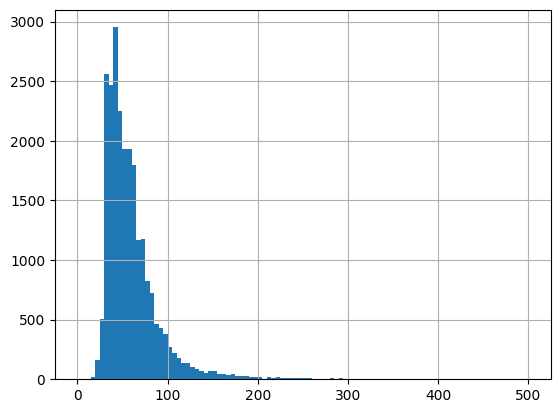

In [18]:
#Построим гистограмму по значениям столбца с общим метражом квартиры

print(data['total_area'].describe())

data['total_area'].hist(bins=100, range=(0, 500))


In [19]:
#Отфильтруем редкие значения с площадью квартир свыше 300 квадратных метров. 

data_filtered = data.query('total_area < 300')

Распределение на графике похоже на нормальное. Но есть неровности, медианное значение не сильно отличается от среднего арифметического, есть небольшое количество аномальных значений. 
Большая часть выборки состоит из квартир с общей площадью 30-60 квадратных метров. Аномальными можно считать значения свыше 300 квадратных метров.  

count    21702.000000
mean        34.013249
std         19.826907
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        250.000000
Name: living_area, dtype: float64


<Axes: >

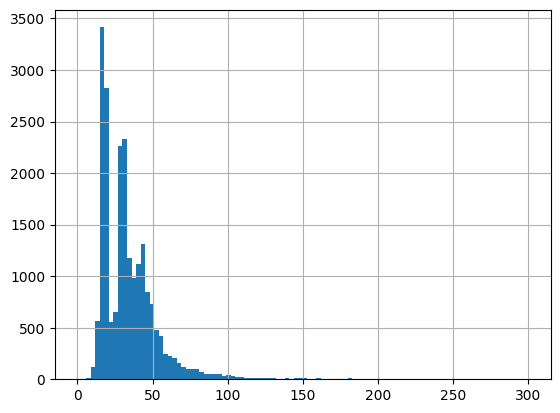

In [20]:
#Построим гистограмму по значениям столбца с метражом жилой площади

print(data_filtered['living_area'].describe())

data_filtered['living_area'].hist(bins=100, range=(0, 300))

In [21]:
#посмотрим срез данных с аномальными значениями жилой площади
print(data_filtered['living_area'].describe())

data_filtered.query('living_area < 20 or (living_area < 45 and living_area > 30)').sort_values(by='living_area')

count    21702.000000
mean        34.013249
std         19.826907
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        250.000000
Name: living_area, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_unit_price,exposition_weekday,exposition_month,exposition_year,city_center_km,floor_type
13915,20,6350000.0,52.00,2018-02-06,2,3.0,6.0,2.00,2,False,...,NaN,1.0,1012.0,91.0,122115.38,1,2,2018,7.0,другой
21758,0,2330000.0,23.00,2018-01-01,0,NaN,24.0,2.00,22,False,...,NaN,NaN,NaN,66.0,101304.35,0,1,2018,NaN,другой
23574,14,64990000.0,139.00,2015-11-24,3,3.0,8.0,3.00,8,False,...,630.0,3.0,100.0,280.0,467553.96,1,11,2015,6.0,последний
3242,7,4440000.0,41.00,2017-07-02,1,NaN,17.0,3.00,17,False,...,NaN,0.0,NaN,216.0,108292.68,6,7,2017,13.0,последний
17582,11,2680000.0,22.00,2018-08-11,0,NaN,25.0,5.00,8,False,...,835.0,1.0,652.0,70.0,121818.18,5,8,2018,12.0,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22623,8,3100000.0,61.00,2018-04-03,4,2.6,5.0,44.90,4,False,...,NaN,NaN,NaN,57.0,50819.67,1,4,2018,NaN,другой
14863,10,5600000.0,72.00,2018-03-13,3,NaN,17.0,44.90,8,False,...,NaN,NaN,NaN,264.0,77777.78,1,3,2018,NaN,другой
11281,13,2590000.0,61.30,2015-05-08,4,NaN,5.0,44.91,1,False,...,NaN,NaN,NaN,NaN,42251.22,4,5,2015,NaN,первый
7391,3,11968000.0,96.38,2018-03-26,2,2.7,12.0,44.99,12,False,...,NaN,0.0,NaN,298.0,124175.14,0,3,2018,14.0,последний


<Axes: >

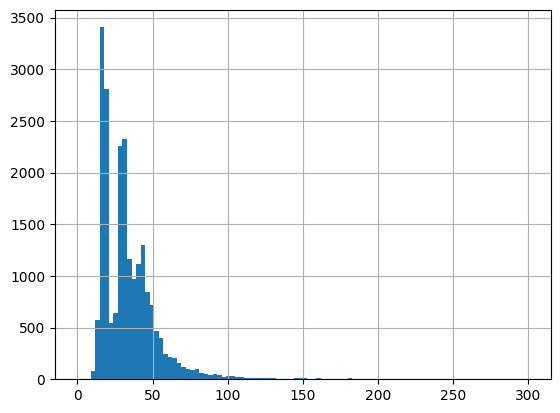

In [22]:
#отфильтруем данные с жилой площадью менее 10 квадратных метров и с долей от общей площади более 80%. 
data_filtered = data_filtered.query('living_area / total_area < 0.8 and living_area > 10')

#построим гистограмму по отфильтрованным данным
data_filtered['living_area'].hist(bins=100, range=(0, 300))

Есть несколько аномальных пиков, на значениях примерно 20 и 40 квадратных метров. Также есть значения по жилой площади менее 10 квадратных метров, что не похоже на жилые помещения. Изучив срез с аномалиями заметили, что также есть квартиры с соотношением жилой площади квартиры к общей площади более 80% (стандартные значения этого соотношения - 50-70%). Эти значения были отфильтрованы. 

В среднем, большинство квартир имеет жилую площадь около 25-45 квадратных метров. Достаточно редко встречаются значения свыше 200 квадратных метров. 

In [23]:
#проверим оставшиеся данные после фильтрации

data_filtered.shape[0] / data_raw

0.9048061099624457

count    20717.000000
mean        10.449775
std          5.609623
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64


<Axes: >

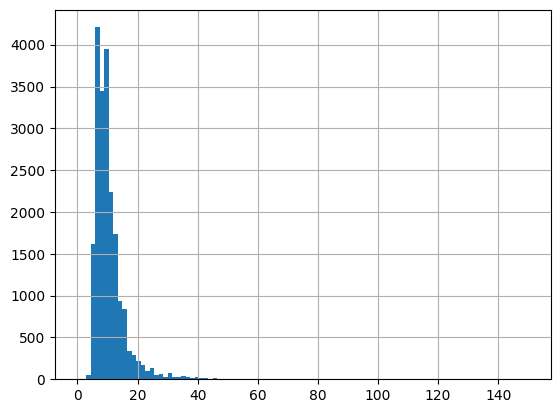

In [24]:
#Построим гистограмму по значениям столбца с метражом кухни

print(data_filtered['kitchen_area'].describe())

data_filtered['kitchen_area'].hist(bins=100, range=(0, 150))

Распределение похоже на нормальное, в среднем квартиры в выборке имеют площадь кухни 10-15 квадратных метров, редкими являются значения площади от 40 квадратных метров и могут достигать 100 квадратных метров. 

count    2.144300e+04
mean     6.281689e+06
std      7.692279e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64


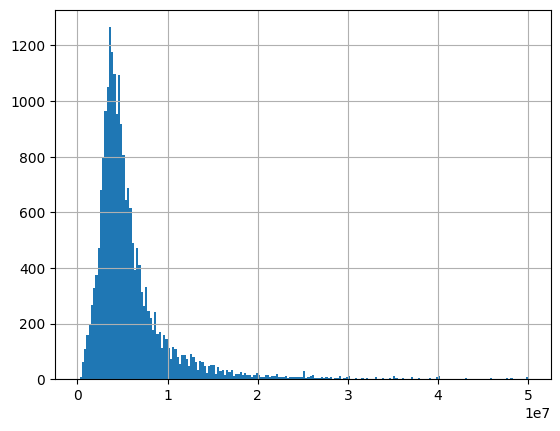

In [25]:
#Построим гистограмму по значениям столбца со стоимостями квартир

print(data_filtered['last_price'].describe())

data_filtered['last_price'].hist(bins=200, range=(0, 50000000))

#отфильтруем данные со значениями стоимостей квартир менее 1 млн рублей. 
data_filtered = data_filtered.query('last_price > 1000000')

Рапределение похоже на нормальное. В среднем стоимость квартир составляет около 5 млн рублей. Достаточно редкой будет стоимость от 20 миллионов рублей. 
Аномальными можно считать значения менее 1 млн рублей, отфильтруем их. 

In [26]:
#проверим оставшиеся данные после фильтрации

data_filtered.shape[0] / data_raw

0.8964935229334571

count    21246.000000
mean         2.065095
std          1.044615
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64


<Axes: >

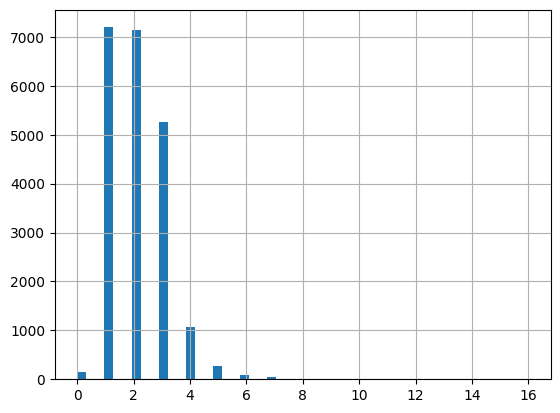

In [27]:
#Построим гистограмму по значениям столбца с количеством комнат

print(data_filtered['rooms'].describe())

data_filtered['rooms'].hist(bins=50)

Найдены редкие и аномальные значения по количеству комнат - 0 и свыше 6. В среднем количество комнат в квартирах составляет 1-2. 
Нулевые значения комнат могут принадлежать данным с квартирами-студиями. 

count    13428.000000
mean         2.768528
std          1.271992
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


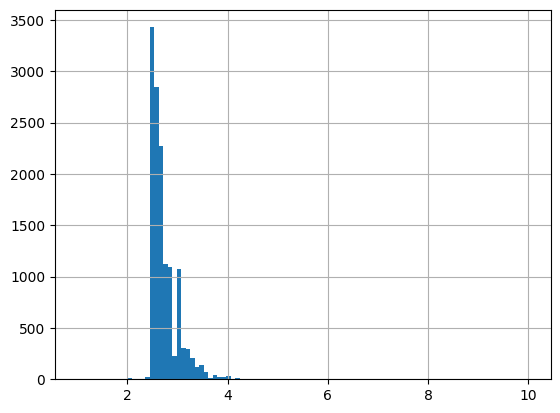

In [28]:
#Построим гистограмму по значениям столбца с количеством комнат

print(data_filtered['ceiling_height'].describe())

data_filtered['ceiling_height'].hist(bins=100, range=(1, 10))

#Заменим неправильно внесенные данные на корректные
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 20, data['ceiling_height'] / 10)


Найдены аномально значения высоты потолков - меньше 2 метров и свыше 3 метров. Ошибки могут быть связаны с неправильным вносом значений высоты потолков вручную.

In [29]:
#проверим оставшиеся данные после фильтрации

data_filtered.shape[0] / data_raw

0.8964935229334571

<Axes: >

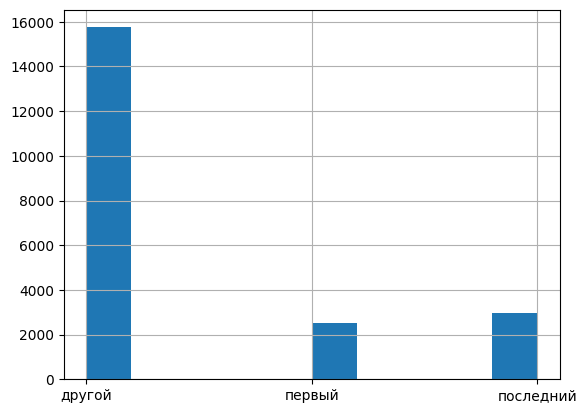

In [30]:
#Построим гистограмму по значениям столбца с типом этажа

data_filtered['floor_type'].hist()

Большее количество квартир на продажу находится на этажах, между первым и последним

count    21196.000000
mean        10.720749
std          6.555967
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


<Axes: >

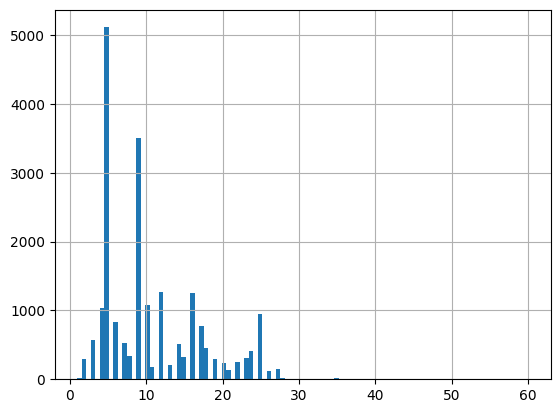

In [31]:
#Построим гистограмму по значениям столбца с количеством этажей
print(data_filtered['floors_total'].describe())

data_filtered['floors_total'].hist(bins=100)

Достаточно редким является количество свыше 30 этажей в жилых зданиях. В среднем здания в выборке высотой около 5 этажей. 

count    16628.000000
mean     14280.093036
std       8668.104712
min        181.000000
25%       9399.750000
50%      13138.000000
75%      16285.000000
max      65968.000000
Name: citycenters_nearest, dtype: float64


<Axes: >

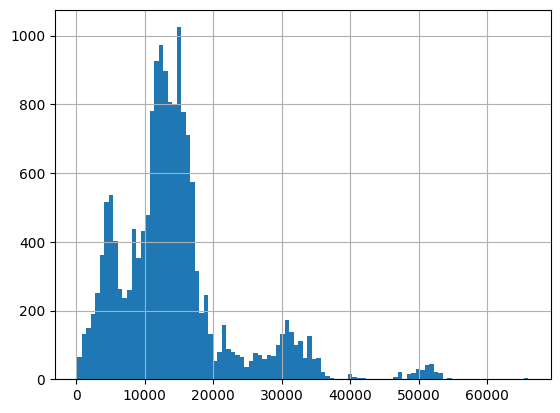

In [32]:
#Построим гистограмму по значениям столбца с близостью центра города

print(data_filtered['citycenters_nearest'].describe())

data_filtered['citycenters_nearest'].hist(bins=100)

Распределение с аномальными пиками в расстояниях до центра примерно 5 км и 30 км, 50 км. Аномальными можно считать значения от 30 км.

count    7358.000000
mean      488.335553
std       337.690036
min         1.000000
25%       288.000000
50%       452.000000
75%       611.000000
max      3190.000000
Name: parks_nearest, dtype: float64


<Axes: >

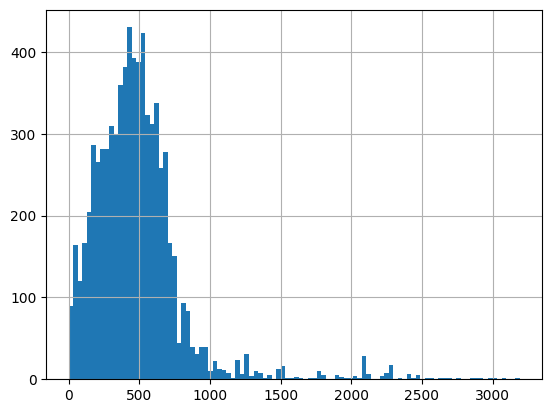

In [33]:
#Построим гистограмму по значениям столбца с близостью парков

print(data_filtered['parks_nearest'].describe())

data_filtered['parks_nearest'].hist(bins=100)

Самая частая близость парков от квартир - примерно 0,5 км, аномальным можно считать расстояние до парка свыше 1100 метров. 

In [34]:
# Вычислим долю оставшихся данных после фильтрации от начального объема в датасете. 

data_filtered.shape[0] / data_raw

0.8964935229334571

count    18353.000000
mean       184.832834
std        221.475177
min          1.000000
25%         44.000000
50%        101.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64


<Axes: >

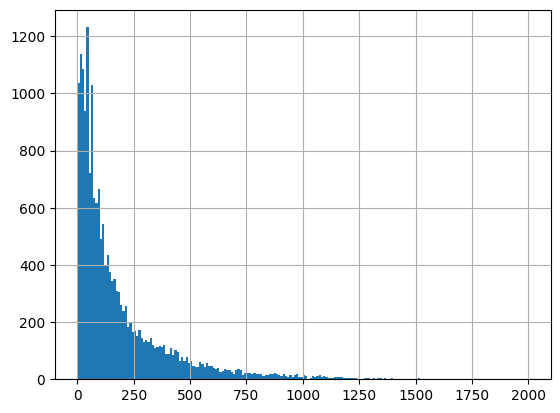

In [35]:
#Построим гистограмму по значениям столбца со сроком публикации до продажи

print(data_filtered['days_exposition'].describe())

data_filtered['days_exposition'].hist(bins=200, range=(0, 2000))


Медианное значение времени продажи - 101 дней, среднее значение - 184 дней. 
То есть обычно продажа занимает по времени около 3-4х месяцев. 
Есть аномальные данные по продаже квартир в течение 1-30 дней - достаточно быстро, если учитывать, что продажа квартиры - долгий и трудоемкий процесс.
Также присутствуют аномально долгие продажи - от 2-5 лет. Допустимо, что такие долгие сроки связаны с непривлекательностью квартиры для покупателей.

<Axes: >

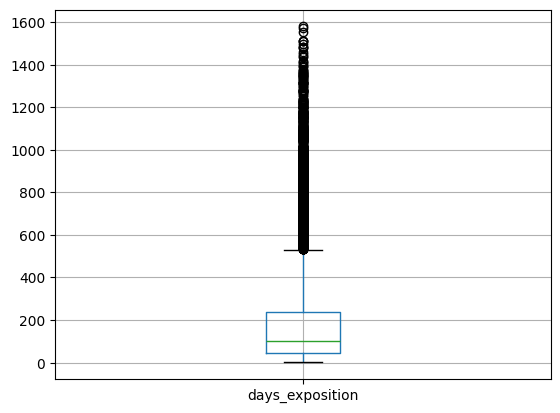

In [36]:
data_filtered.boxplot('days_exposition')

In [37]:
#Создадим собственную функцию для категоризации по общей площади квартир

def categorize_area(area):
    try:
        if 12 <= area <= 40:
            return 'маленькая'
        elif 40 < area <= 70:
            return 'средняя'
        elif 70 < area <= 250:
            return 'большая'
        elif area > 250:
            return 'аномалия'
    except:
        pass

#создадим новый столбец с данными о категории общей площади квартиры
    
data_filtered['total_area_category'] = data_filtered['total_area'].apply(categorize_area)    

#построим сводную таблицу с медианными значениями стоимостей квартир по категориям общей площади и количеством таких объявлений

data_filtered.pivot_table(index='total_area_category', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
total_area_category,,
аномалия,39000000.0,43
большая,9100000.0,5090
маленькая,3350000.0,5370
средняя,4690000.0,10743


Оставили данные с аномалиями, так как выборка уже составляет 90% от первоначальной

<Axes: xlabel='total_area'>

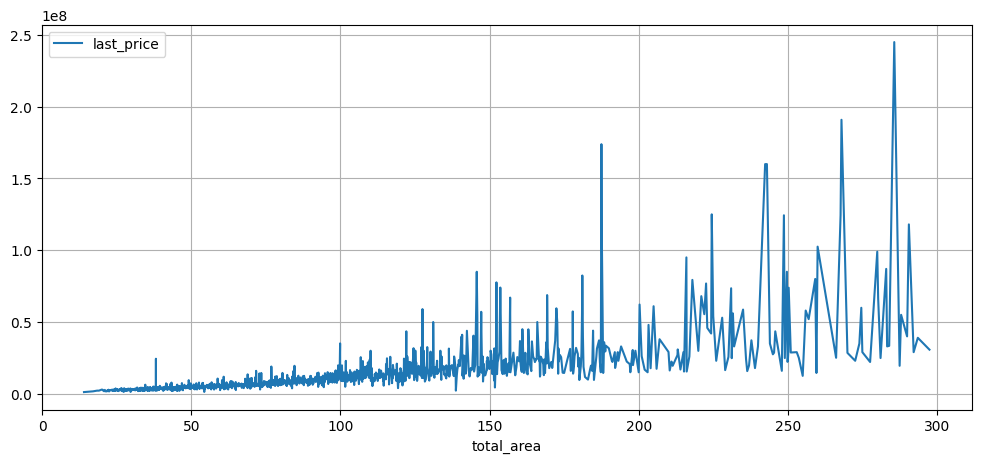

In [38]:
(
    data_filtered.pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)

По данному графику можем увидеть, что фактор общей площади квартиры пропорционально влияет на ее полную стоимость, при значениях площади свыше 150 квадратных метров стоимость меняется менее пропорционально, чем на малых площадях. 

<Axes: xlabel='kitchen_area'>

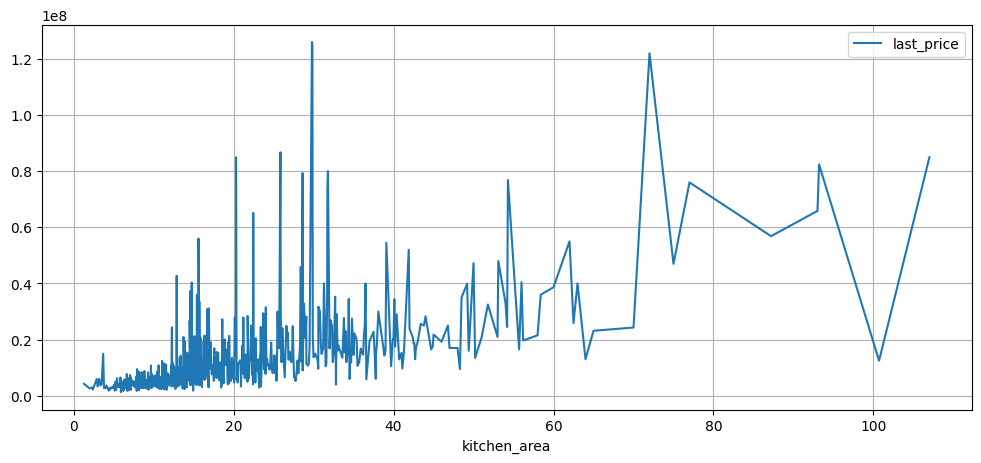

In [39]:
(
    data_filtered.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)

По графику можем увидеть, что при площадях до 30 квадратных метров полная стоимость сильно зависит от площади кухни, но при значениях площади от 30 квадратных метров и выше стоимость теряет эту зависимость. 

<Axes: xlabel='living_area'>

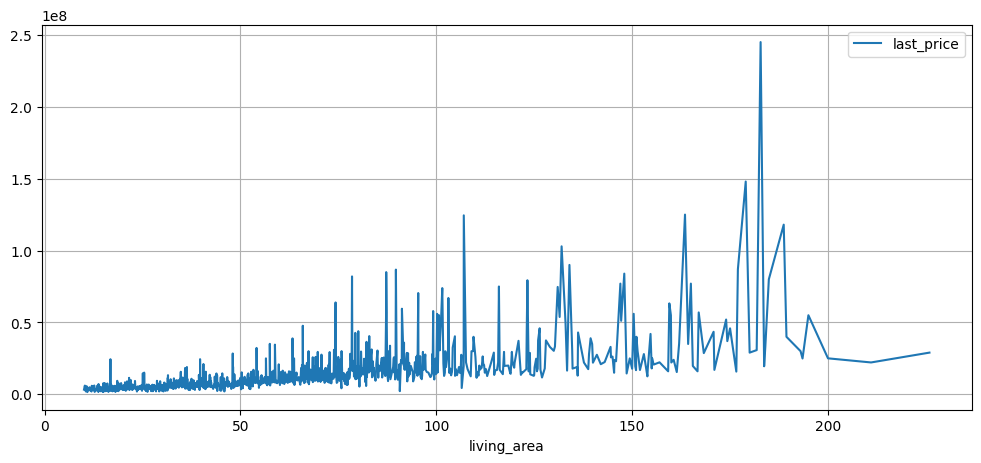

In [40]:
(
    data_filtered.pivot_table(index='living_area', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)

По графику видим, что жилая площадь как фактор пропорционально влияет на полную стоимость квартиры.

<Axes: xlabel='rooms'>

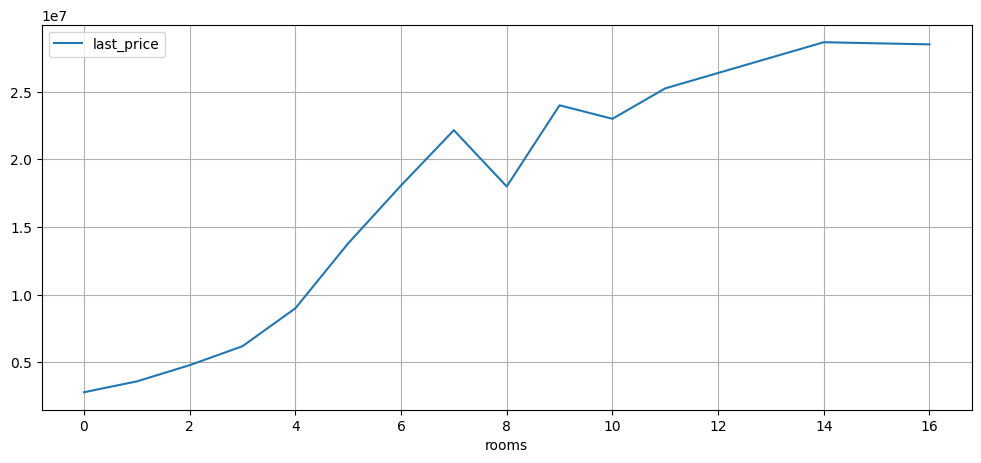

In [41]:
(
    data_filtered.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)

Количество комнат пропорционально влияет на стоимость квартиры, но при количестве комнат свыше 12 эта связь пропадает. 

<Axes: xlabel='floor_type'>

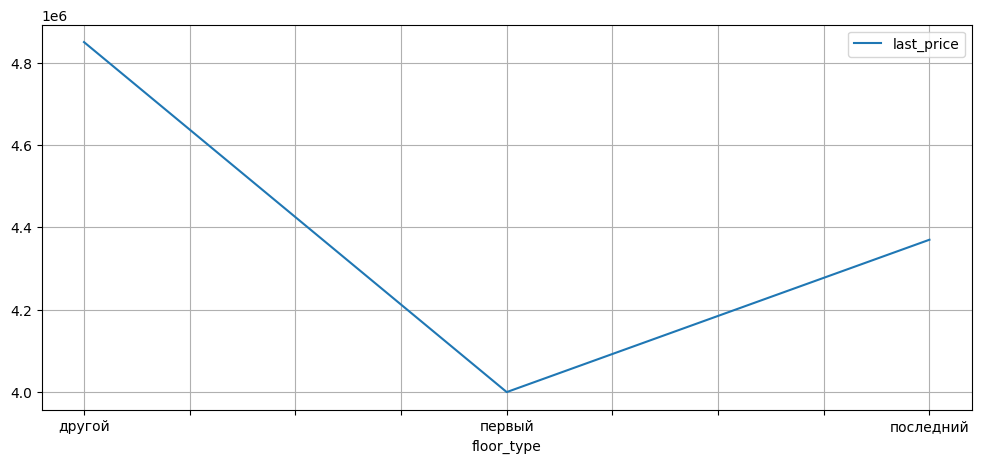

In [42]:
(
    data_filtered.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)


По графику видим, что медианная стоимость квартир имеет зависимость по категориям, в зависимости от этаж. Так, например, стоимость квартир, расположенных на первом этаже ниже, чем стоимость квартир на последнем этаже. Но Наибольшей стоимостью обладают квартиры, расположенные между первым и последним этажом. 
Но нельзя утверждать, что стоимость пропорционально увеличивается в зависимости от номера этажа. 

<Axes: xlabel='exposition_weekday'>

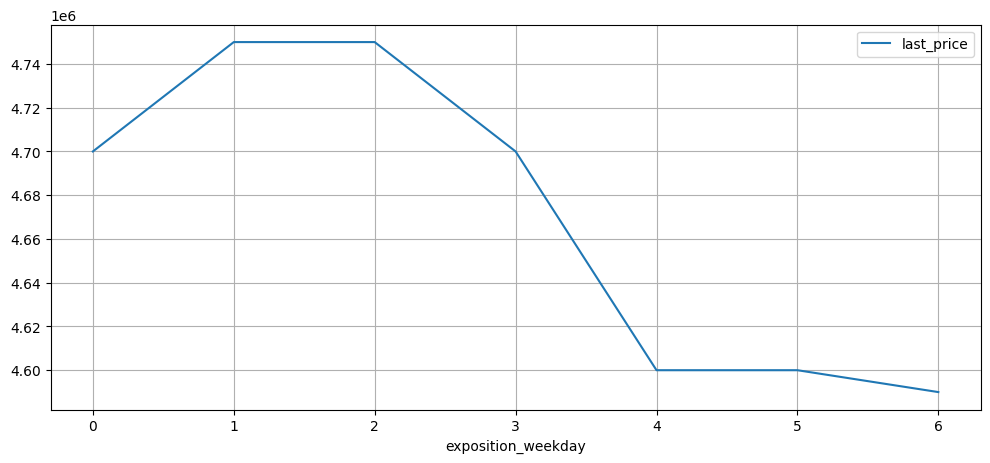

In [43]:
(
    data_filtered.pivot_table(index='exposition_weekday', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)

По графику видим, что между стоимостью квартир и днем публикации объявления в неделе нет сильной зависимости. Большую медианную стоимость имеют квартиры, опубликованные во вторник-среду. 

<Axes: xlabel='exposition_month'>

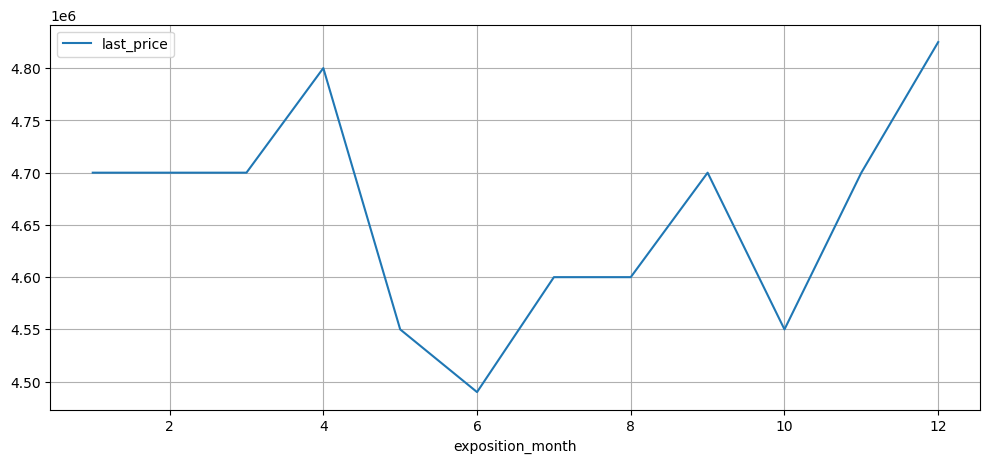

In [44]:
(
    data_filtered.pivot_table(index='exposition_month', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)

По графику видим, что нет зависимости между стоимостью квартир и месяцем публикации. Наименьшую медианную стоимость имеют квартиры, опубликованные в июне. 

<Axes: xlabel='exposition_year'>

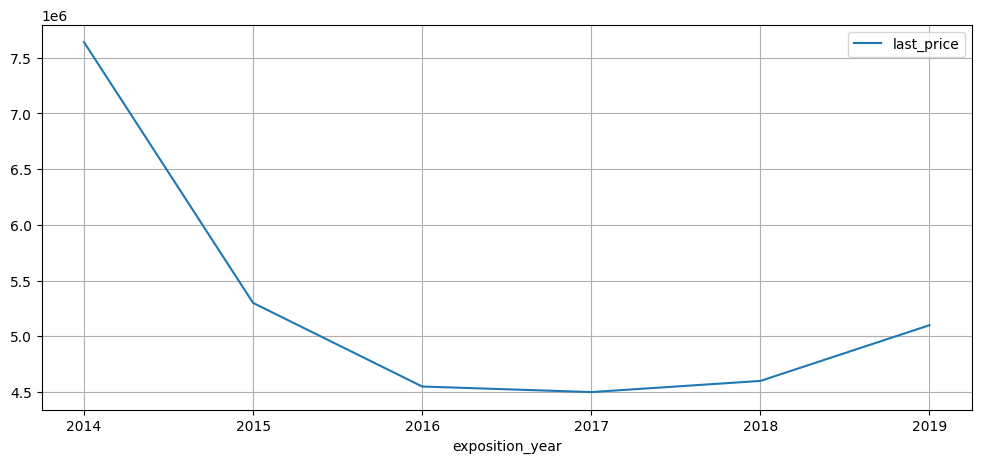

In [45]:
(
    data_filtered.pivot_table(index='exposition_year', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)

По графику можем увидеть, что есть некая обратная зависимость между годом публикации и стоимостью объектов, но до 2018 года. В 2019 году видим небольшой подъем стоимости квартир.

<Axes: xlabel='exposition_year'>

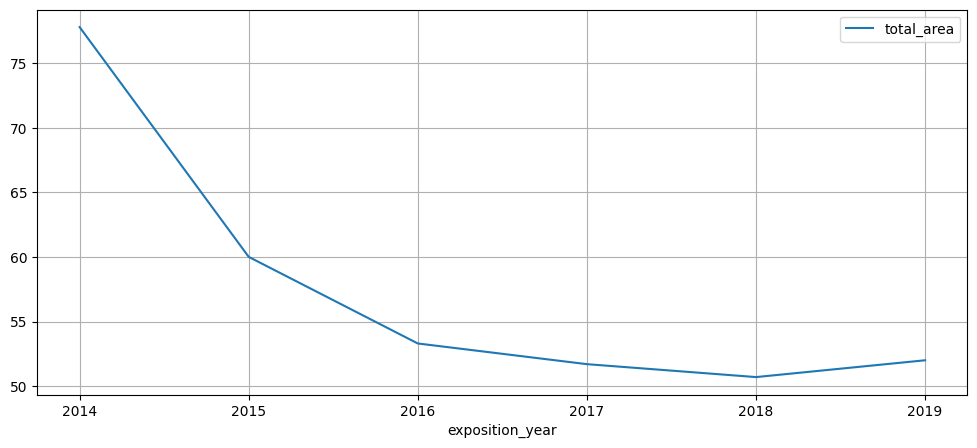

In [46]:
(
    data_filtered.pivot_table(index='exposition_year', values='total_area', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)

Построили новый график динамики изменения общей площади квартир по годам. График повторяет вид зависимости стоимости по годам - то есть упала площадь продаваемых квартир (соответственно упала и медианная стоимость по годам, которая зависит от площади квартиры). 


In [47]:
#Посчитаем среднюю цену 1 кв м в 10 населенных пунктах с наибольшим числом объявлений и построим сводную таблицу. 

( 
    data_filtered.pivot_table(index='locality_name', values='area_unit_price', aggfunc=['mean', 'count'])
    .rename(columns={'count': 'количество_объявлений','mean': 'средняя_цена_1_кв_м', 'area_unit_price': ''})
    .sort_values(by=['количество_объявлений'], ascending=False)[:10]
)


,средняя_цена_1_кв_м,количество_объявлений
,,
locality_name,,
Санкт-Петербург,113588.352474,14361
Мурино,86413.654599,511
Кудрово,95700.907990,418
Шушары,78911.278856,402
Всеволожск,68852.147658,363
Пушкин,103494.456804,341
Колпино,75246.281227,326
Парголово,90399.098400,300


Самой высокой стоимостью квадратного метра обладает Санкт-Петербург - 113,6 тыс рублей.  Самой низкой стоимостью квадратного метра обладает населенный пункт Гатчина - 68,7 тыс рублей. 

<Axes: xlabel='city_center_km'>

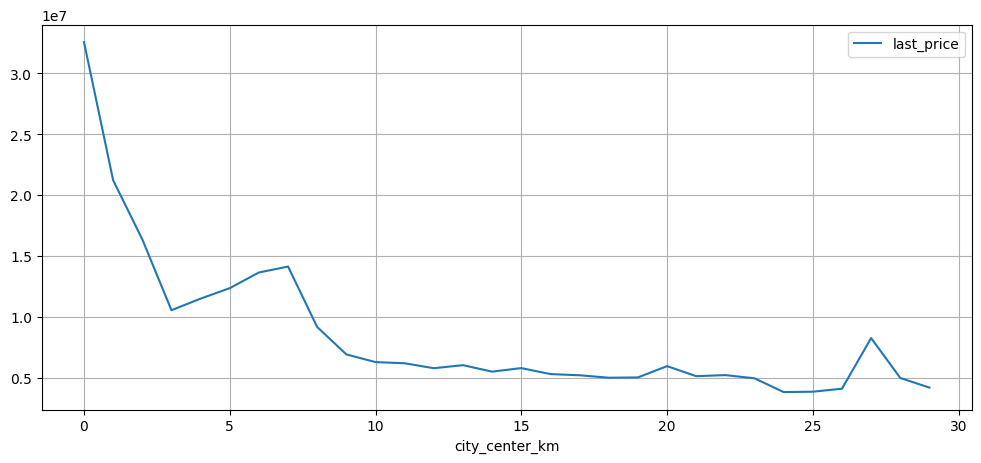

In [48]:
#выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра  

(
    data_filtered.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_center_km', values='last_price')
    .plot(grid=True, figsize=(12, 5))
)


Стоимость объектов обратно пропорционально зависит от расстояния до центра города - чем дальше квартира от центра города, тем она дешевле. Но на расстояних до 5 км от центра этой зависимости практически нет. 

### Общий вывод

В ходе выполнения проекта была проведена предобработка данных и в результате была достигнута цель - провести исследовательский анализ данных и установить параметры, влияющие на цену объектов недвижимости. 
 
1) На стоимость объектов влияют следующие факторы:
общая площадь квартиры, жилая площадь и площадь кухни, количество комнат - прямо пропорционально влияют на стоимость, в то время как дата размещения не имеет прямого влияния на стоимость квартир. На графике зависимости стоимости объекта от года увидели спад стоимости в течение времени, но также увидели небольшой подъем в 2019 году. 
Есть наблюдение о том, что стоимость квартир на первом и последнем этажах на порядок ниже стоимости квартир на других этажах. 

2) Также, был изучено, как быстро продавались квартиры.
Обычно продажа занимает около 3-4х месяцев. Есть аномальные данные по продаже квартир в течение 1-30 дней - достаточно быстро, если учитывать, что продажа квартиры - долгий и трудоемкий процесс. Также присутствуют аномально долгие продажи - от 2-5 лет. Допустимо, что такие долгие сроки связаны с непривлекательностью квартиры для покупателей.

3) Была посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
Самой высокой стоимостью квадратного метра обладает Санкт-Петербург - 113,6 тыс рублей.  Самой низкой стоимостью квадратного метра обладает населенный пункт Гатчина - 68,7 тыс рублей.  

4) Также, выяснили, что стоимость объектов имеет обратно пропорциональную зависимость от расстояния до центра города. Чем дальше квартира от центра города, тем она дешевле. Но на расстояних до 5 км от центра этой зависимости практически нет. 